## 1- Importation du bibliotheque Pandas

In [1]:
import pandas as pd 

## 2- chargement des données

In [2]:
ds = pd.read_csv("C:/Users/Yassin/OneDrive/Documents/Data/IMDB Dataset.csv")
ds

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## 3-longueur du données 

In [3]:
df=len(ds['sentiment'])
df

50000

In [4]:
ds['sentiment'].count()

50000

## 4-Nettoyage des données

In [5]:
import re 
def clean_text(text):
        text = re.sub(r'<.*?>', '', text)
        text = text.lower()
        text = re.sub(r"[^a-z\s]", "", text)
        return text


In [6]:
ds['review'] = ds['review'].apply(clean_text)


In [7]:
ds

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

nltk.download('punkt')
nltk.download('stopwords')

stop = set(stopwords.words('english'))

tokenizer = ToktokTokenizer()

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens] 
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text



C:\Users\Yassin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yassin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yassin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
ds['review'] = ds['review'].apply(remove_stopwords)

ds['review'].head()

0    one reviewers mentioned watching oz episode yo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically theres family little boy jake thinks...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

## 5-Stemming 

In [10]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

def stemming(text):
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)
    print(stemmed_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yassin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
ds['review']=ds['review'].apply(stemming)
ds

,review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive
...,...,...
49995,thought movi right good job wasnt creativ orig...,positive
49996,bad plot bad dialogu bad act idiot direct anno...,negative
49997,cathol taught parochi elementari school nun ta...,negative
49998,im go disagre previou comment side maltin one ...,negative


## 6-TF IDF ET ENTRAINEMENT

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report

In [17]:
texts = ds['review']  
labels = ds['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  


In [21]:
texts_train, texts_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [22]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = tfidf.fit_transform(texts_train)
X_test = tfidf.transform(texts_test)


In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8807
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      4961
           1       0.87      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## 7-Visualisation des données 

### Distribution des sentiments

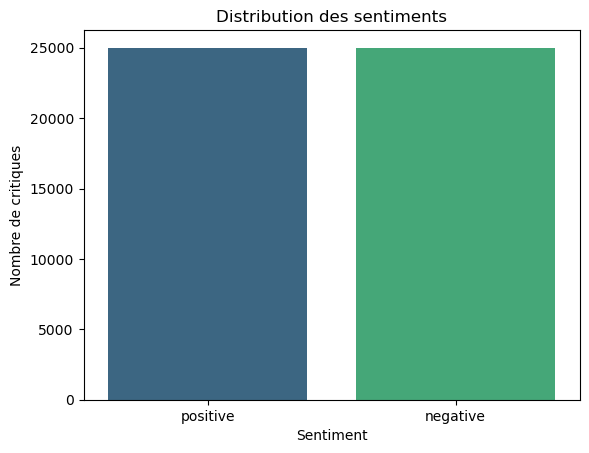

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = ds['sentiment'].value_counts()

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution des sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de critiques")
plt.show()


### Longueur des critiques

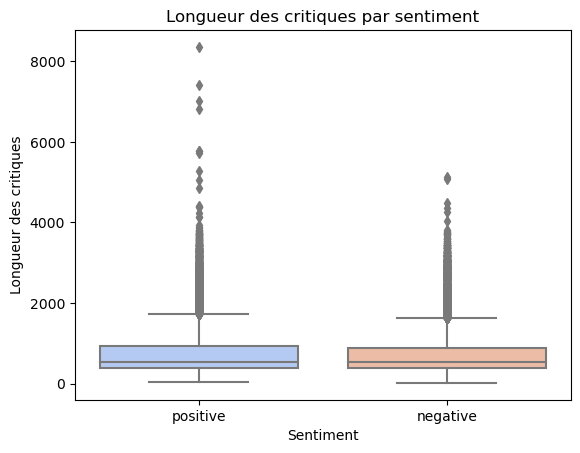

In [26]:
ds['review_length'] = ds['review'].apply(len)

sns.boxplot(x='sentiment', y='review_length', data=ds, palette="coolwarm")
plt.title("Longueur des critiques par sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Longueur des critiques")
plt.show()


### Nuage de mots (WordCloud)

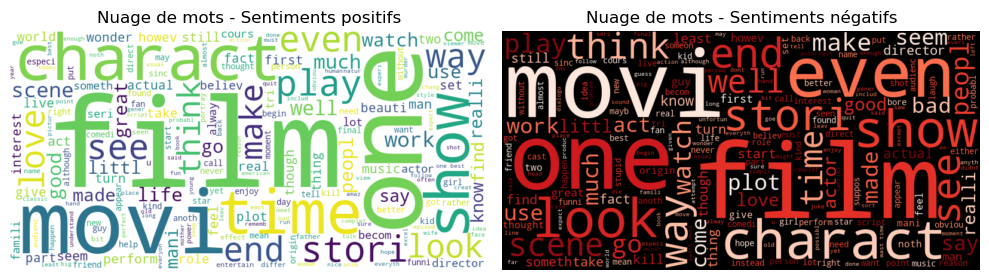

In [27]:
from wordcloud import WordCloud

positive_reviews = " ".join(ds[ds['sentiment'] == 'positive']['review'])
negative_reviews = " ".join(ds[ds['sentiment'] == 'negative']['review'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Nuage de mots - Sentiments positifs")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Nuage de mots - Sentiments négatifs")
plt.axis("off")

plt.tight_layout()
plt.show()


### Fréquence des mots les plus courants

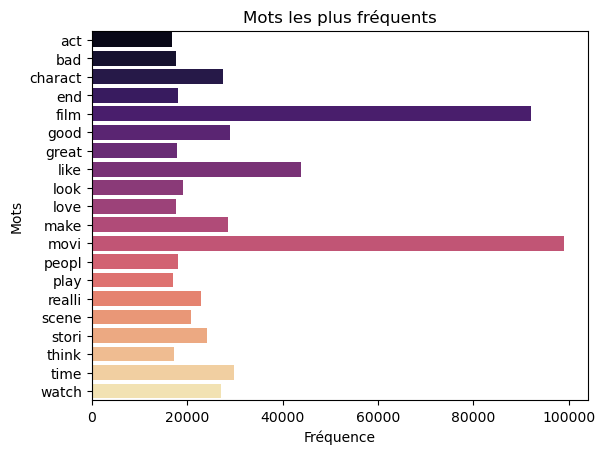

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(ds['review'])

words = vectorizer.get_feature_names_out()
frequencies = word_counts.sum(axis=0).A1

sns.barplot(x=frequencies, y=words, palette="magma")
plt.title("Mots les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.show()


# FIN.